### Explicit Evaluation of the Product of Two Splines (B-Splines)

In [2]:
import sys
sys.path.append("../../basis/")
sys.path.append("../../estimators/spines/")
sys.path.append("../../matrix_algorithms/")

import numpy as np
from matplotlib import pyplot as plt
from biprod_b_spline import Biprod_B_Spline_Basis

from regression_spline_estimator import Regression_Spline_Estimator
from k_differences import differences

To compute the product of two splines we first need to generate two univariate splines $s_1$ and $s_2$ of noisy observations. We then compute the product of the splines using the `spline_prod` function. The product of two splines is a spline of degree $d_1+d_2-1$

### Generate Noisy Data and Equally Spaced Knots

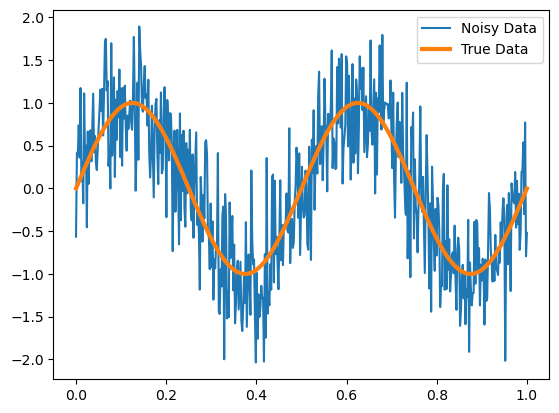

In [3]:
x=np.linspace(0,1,500)
y=np.sin(4*np.pi*x)
derivative=4*np.pi*np.cos(4*np.pi*x)
double_derivative=-16*np.pi**2*np.sin(4*np.pi*x)
noisy=y+np.random.normal(0,0.5,500)

plt.plot(x,noisy, label='Noisy Data')
plt.plot(x,y, label='True Data',lw=3)
#plt.plot(x,derivative, label='True Derivative',lw=3)
#plt.plot(x,double_derivative, label='True Double Derivative',lw=3)
plt.legend()


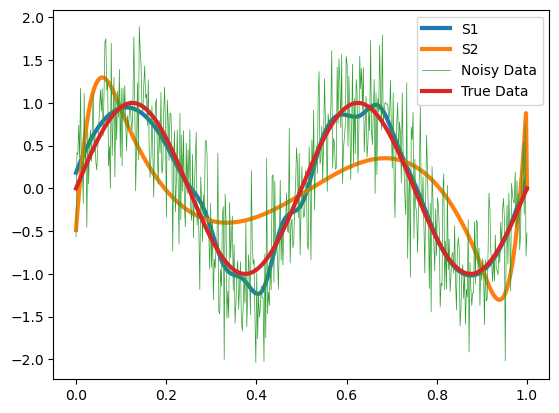

In [5]:
gamma_a=np.linspace(0.2,0.8,15)
gamma_b=np.linspace(0.1,0.9,3)

s1=Regression_Spline_Estimator(x,noisy,gamma_a,degree=3)
s1.fit()

plt.plot(x,s1.estimate(x),lw=3,label='S1')

s2=Regression_Spline_Estimator(x,noisy,gamma_b,degree=3)
s2.fit()

plt.plot(x,s2.estimate(x),lw=3,label='S2')


plt.plot(x,noisy, label='Noisy Data',lw=0.5)
plt.plot(x,y, label='True Data',lw=3)

plt.legend()

### Compute the Product of the Splines

In [6]:
prod_basis=Biprod_B_Spline_Basis([s1,s2])

Knots with duplicates for first estimator: 23
Knots with duplicates for second estimator: 11
Number of knots with duplicates in byproduct: 82
Number of unique knots in byproduct: 19
 
Number of parameters for first estimator: 23
Number of parameters for second estimator: 11
Number of basis functions: 82
Shape of tau: (82, 23, 11, 4, 4)
First diff: (82, 23)
Second diff: (82, 23)
Term1: (82, 11)
Term2: (82, 11)
First diff: (82, 11)
Second diff: (82, 11)
Term3: (82, 23)
Term4: (82, 23)
First diff: (82, 23)
Second diff: (82, 23)
Term1: (82, 11)
Term2: (82, 11)
First diff: (82, 11)
Second diff: (82, 11)
Term3: (82, 23)
Term4: (82, 23)
First diff: (82, 23)
Second diff: (82, 23)
Term1: (82, 11)
Term2: (82, 11)
First diff: (82, 11)
Second diff: (82, 11)
Term3: (82, 23)
Term4: (82, 23)
First diff: (82, 23)
Second diff: (82, 23)
Term1: (82, 11)
Term2: (82, 11)
First diff: (82, 11)
Second diff: (82, 11)
Term3: (82, 23)
Term4: (82, 23)
First diff: (82, 23)
Second diff: (82, 23)
Term1: (82, 11)
Ter

ValueError: shapes (23,11) and (7,1) not aligned: 11 (dim 1) != 7 (dim 0)

In [ ]:
prod_basis.G_h

0.0

In [ ]:
for i,ct in  enumerate(range(2,10)):
    print(ct)

2
3
4
5
6
7
8
9


### Looking into Differences

In [ ]:
s1.basis.gamma

array([0.        , 0.        , 0.        , 0.        , 0.2       ,
       0.24285714, 0.28571429, 0.32857143, 0.37142857, 0.41428571,
       0.45714286, 0.5       , 0.54285714, 0.58571429, 0.62857143,
       0.67142857, 0.71428571, 0.75714286, 0.8       , 1.        ,
       1.        , 1.        , 1.        ])

In [ ]:
differences(s1.basis.gamma,1)

[0.0,
 0.0,
 0.0,
 0.2,
 0.04285714285714287,
 0.04285714285714287,
 0.04285714285714287,
 0.042857142857142816,
 0.04285714285714293,
 0.042857142857142816,
 0.042857142857142816,
 0.04285714285714293,
 0.04285714285714293,
 0.042857142857142816,
 0.042857142857142816,
 0.04285714285714293,
 0.04285714285714293,
 0.042857142857142705,
 0.19999999999999996,
 0.0,
 0.0,
 0.0]

In [ ]:
differences(s1.basis.gamma,2)

[0.0,
 0.0,
 0.2,
 0.24285714285714288,
 0.08571428571428574,
 0.08571428571428574,
 0.08571428571428569,
 0.08571428571428574,
 0.08571428571428574,
 0.08571428571428563,
 0.08571428571428574,
 0.08571428571428585,
 0.08571428571428574,
 0.08571428571428563,
 0.08571428571428574,
 0.08571428571428585,
 0.08571428571428563,
 0.24285714285714266,
 0.19999999999999996,
 0.0,
 0.0]

In [ ]:
from collections import Counter

In [ ]:
freq_a = Counter(s1.basis.gamma)
freq_b = Counter(s2.basis.gamma)

sorted_knots = sorted(set(s1.basis.gamma).union(set(s2.basis.gamma)))

# need to correctly account for multiplicity of knots
multiplicty = dict(
        zip(
            sorted_knots,
            [
                max(
                    4 + freq_a[knot] - 1 if knot in freq_a else 4,
                    4 + freq_b[knot] - 1 if knot in freq_b else 4,
                )
                for knot in sorted_knots
            ],
        )
    )

new_knots = [[knot for i in range(multiplicty[knot])] for knot in multiplicty.keys()]
new_knots = [knot for sublist in new_knots for knot in sublist]

     

In [ ]:
Counter(new_knots)

Counter({0.0: 7,
         0.1: 4,
         0.2: 4,
         0.24285714285714288: 4,
         0.28571428571428575: 4,
         0.3285714285714286: 4,
         0.37142857142857144: 4,
         0.41428571428571437: 4,
         0.4571428571428572: 4,
         0.5: 4,
         0.5428571428571429: 4,
         0.5857142857142859: 4,
         0.6285714285714287: 4,
         0.6714285714285715: 4,
         0.7142857142857144: 4,
         0.7571428571428573: 4,
         0.8: 4,
         0.9: 4,
         1.0: 7})

In [ ]:
s1.gamma

array([[ 0.1541725 ],
       [ 0.66776099],
       [ 1.75033306],
       [ 0.12164377],
       [-0.59180303],
       [-0.64357734],
       [-1.19589989],
       [-0.62760518],
       [-0.71026732],
       [-0.05272824],
       [ 0.30028734],
       [ 1.1593948 ],
       [ 0.85617608],
       [ 0.96174424],
       [ 0.33701601],
       [-0.04918106],
       [-1.30352219],
       [-1.28263602],
       [ 0.06915732]])

In [ ]:
s2.gamma

array([[-0.59894996],
       [ 1.78689694],
       [-0.58745732],
       [-0.278182  ],
       [ 1.04413038],
       [-2.09408466],
       [ 0.98598032]])

In [ ]:
import numpy as np

In [ ]:
a=np.zeros((10,120,20,40,50))

In [ ]:
a.shape

(10, 120, 20, 40, 50)

In [ ]:
a.transpose(1,0,2,3,4).shape

(120, 10, 20, 40, 50)